In [1]:
from scipy.optimize import fsolve
import numpy as np

In [2]:
def lodka_volterra_implicit(X,*args):
    X_old=np.zeros(len(X))
    (alpha,beta,gamma,delta,dt,*X_old)=args
    res=np.zeros(len(X))
    x,y=X
    x_old,y_old=X_old
    res[0]=x*(1- alpha*dt + beta*dt*y)- x_old
    res[1]=y*(1- gamma*dt*x + delta*dt)- y_old
    return res

In [3]:
x0=[5,5]
t=np.linspace(0,100,5000001)
alpha=4.0
beta=2.0
gamma=3.0
delta=4.0


In [4]:
def Implicit(func,X,t,**kwargs):
    args=kwargs["args"]
    res=np.zeros((len(t),len(X)))
    time_old=0
    res[0]=X
    for time in range(1,len(t)):
        dt=t[time]-time_old
        args1=list(args)
        args1.append(dt)
        args1+=list(res[time-1])
        args1=tuple(args1)
        res[time]=fsolve(func,res[time-1],args1)
        time_old=t[time]
    return res

In [5]:
sol=Implicit(lodka_volterra_implicit,x0,t,args=(alpha,beta,gamma,delta))

In [6]:
print(sol)

[[5.         5.        ]
 [4.99939985 5.00110006]
 [4.99879956 5.00220019]
 ...
 [0.39992984 7.56611081]
 [0.39984082 7.56568706]
 [0.39975183 7.56526329]]


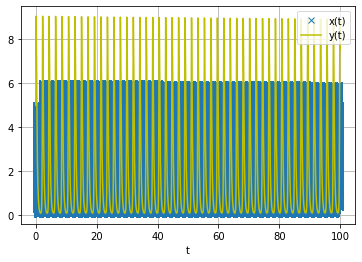

In [7]:
import matplotlib.pyplot as plt
plt.plot(t,sol[:,0], 'x',label='x(t)')
plt.plot(t,sol[:,1], 'y',label='y(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

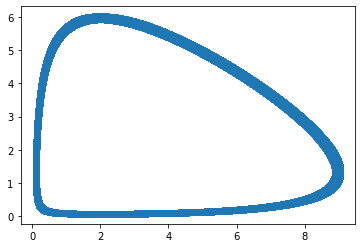

In [8]:
plt.scatter(sol[:,1], sol[:,0],label= 'x(t) vs y(t)')